#### 특성 추출: TF-IDF (자연어 처리/벡터화)
- 단어의 빈도(Term Frequency)와 역 문서 빈도(Inverse Document Frequency)를 토대로, 특정 문서 내에 어떤 단어가 얼마나 중요한 지를 나타내는 통계적 수치
- 다른 문서(또는 문장)에서 잘 등장하지 않지만, 이 문서 혹은 현재 문장에서는 유독 많이 쓰인 단어가 이 문서의 키워드 값이 된다.

##### TF (Term Frequency) 
- 단어 빈도를 나타낸다.
- 즉, 문서 내에서 특정 단어가 몇 번 발견되었는지를 계산.
- 문서-단어 행렬이 곧 단어들의 TF 값을 구한 것임

##### IDF (Inverse Document Frequency)
- DF 의 역수이며, 특정 단어가 발견되는 문서의 수를 뜻한다.
- 즉, 특정 문서가 아닌 대부분의 문서에서 발견되는 단어는 그만큼 흔하게 사용되어 중요한 의미를 갖지 않는다고 볼 수 있다.

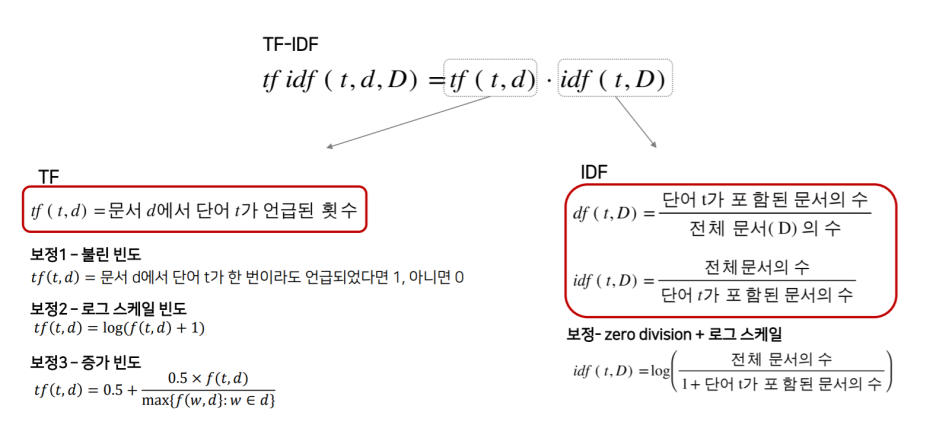

- 데이터 셋 구성

In [58]:
data=[['전세','대출', '위험', 'ㅋ', 'ㅋ', '대출'],
      ['전세','보증금'],
      ['전세','대출', '부동산', '내공', '문', 'ㄱ'],
      ['전세','보증금', '보증금', '보증금'],
      ['전세','대출', '보증금'],
      ['부동산','강제', '경매', '관련', '질문','ㅁ'],
      ['전세','확정', '일자', '집', '주인', '담보', '대출', '경매', '보증금'],
      ['전세','계약', '예정', '안전', '집', '확인', '내공', '투자']]

2. 단어를 이용한 필드 제목_단어 고유값 생성

In [59]:
# data에서 고유값이 무엇인지 뽑아본다. 
# 그리고 불필요한 데이터를 제거한다.
wordlist=[n for i in data for n in i] # 모든 문장을 하나의 문장으로 만들어준다.
#set(wordlist) # 고유 데이터 생성 -> 집합으로 출력
vocab=sorted(list(set(wordlist))) # 고유 데이터 생성=>딕셔너리에서 리스트=>정렬=>vocab 저장

In [60]:
print(vocab)

['ㄱ', 'ㅁ', 'ㅋ', '강제', '경매', '계약', '관련', '내공', '담보', '대출', '문', '보증금', '부동산', '안전', '예정', '위험', '일자', '전세', '주인', '질문', '집', '투자', '확인', '확정']


In [61]:
import re

# 한글자음/모음, 특수문자, 한자 등 제거/정규식 표현법
tmp=['**'.join(re.findall('[가-힣a-z,A-Z0-9]+', w)) for w in vocab]
vocab2=[ t for t in sorted(list(set(tmp))) if t != '']
print(tmp)
print(vocab)
print(data)

['', '', '', '강제', '경매', '계약', '관련', '내공', '담보', '대출', '문', '보증금', '부동산', '안전', '예정', '위험', '일자', '전세', '주인', '질문', '집', '투자', '확인', '확정']
['ㄱ', 'ㅁ', 'ㅋ', '강제', '경매', '계약', '관련', '내공', '담보', '대출', '문', '보증금', '부동산', '안전', '예정', '위험', '일자', '전세', '주인', '질문', '집', '투자', '확인', '확정']
[['전세', '대출', '위험', 'ㅋ', 'ㅋ', '대출'], ['전세', '보증금'], ['전세', '대출', '부동산', '내공', '문', 'ㄱ'], ['전세', '보증금', '보증금', '보증금'], ['전세', '대출', '보증금'], ['부동산', '강제', '경매', '관련', '질문', 'ㅁ'], ['전세', '확정', '일자', '집', '주인', '담보', '대출', '경매', '보증금'], ['전세', '계약', '예정', '안전', '집', '확인', '내공', '투자']]


3. TF(erm Frequency):단어 빈도 계산

In [62]:
l=['1','2','3']
'**'.join(l)

'1**2**3'

In [63]:
aa=[['a', 'bb'], ['b'], ['c']]
bb=[]
for a in aa:
    bb.append(("-".join(a)))
bb

['a-bb', 'b', 'c']

In [68]:
import pandas as pd

dtm = []
for lst in data:
    dtm.append([])
    for word in vocab2:
        dtm[-1].append(lst.count(word))
tf_df = pd.DataFrame(dtm, columns=vocab2)
tf_df

,강제,경매,계약,관련,내공,담보,대출,문,보증금,부동산,...,예정,위험,일자,전세,주인,질문,집,투자,확인,확정
0,0,0,0,0,0,0,2,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,3,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6,0,1,0,0,0,1,1,0,1,0,...,0,0,1,1,1,0,1,0,0,1
7,0,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,1,1,0


In [54]:
['전세','대출','위험','ㅋ','ㅋ'].count('ㅋ')

2

4. IDF(Inverse Document Frequency): 특정 단어가 발견되는 문서의 수


In [75]:
import numpy as np
# 총 문서(문장의 수)수 계산
df_cnt=len(tf_df)
df=tf_df.astype(bool).sum() # bool 형태로 만들고 sum 해준다. # 단어 출현 건수
idf=np.log10(df_cnt/(1+df)) # idf 
idf

강제     0.602060
경매     0.425969
계약     0.602060
관련     0.602060
내공     0.425969
담보     0.602060
대출     0.204120
문      0.602060
보증금    0.204120
부동산    0.425969
안전     0.602060
예정     0.602060
위험     0.602060
일자     0.602060
전세     0.000000
주인     0.602060
질문     0.602060
집      0.425969
투자     0.602060
확인     0.602060
확정     0.602060
dtype: float64

5.TF-IDF 계산

In [76]:
tf_idf = tf_df*idf
tf_idf

,강제,경매,계약,관련,내공,담보,대출,문,보증금,부동산,...,예정,위험,일자,전세,주인,질문,집,투자,확인,확정
0,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.40824,0.00000,0.00000,0.000000,...,0.00000,0.60206,0.00000,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
1,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.20412,0.000000,...,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
2,0.00000,0.000000,0.00000,0.00000,0.425969,0.00000,0.20412,0.60206,0.00000,0.425969,...,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
3,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.61236,0.000000,...,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
4,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.20412,0.00000,0.20412,0.000000,...,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
5,0.60206,0.425969,0.00000,0.60206,0.000000,0.00000,0.00000,0.00000,0.00000,0.425969,...,0.00000,0.00000,0.00000,0.0,0.00000,0.60206,0.000000,0.00000,0.00000,0.00000
6,0.00000,0.425969,0.00000,0.00000,0.000000,0.60206,0.20412,0.00000,0.20412,0.000000,...,0.00000,0.00000,0.60206,0.0,0.60206,0.00000,0.425969,0.00000,0.00000,0.60206
7,0.00000,0.000000,0.60206,0.00000,0.425969,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.60206,0.00000,0.00000,0.0,0.00000,0.00000,0.425969,0.60206,0.60206,0.00000
